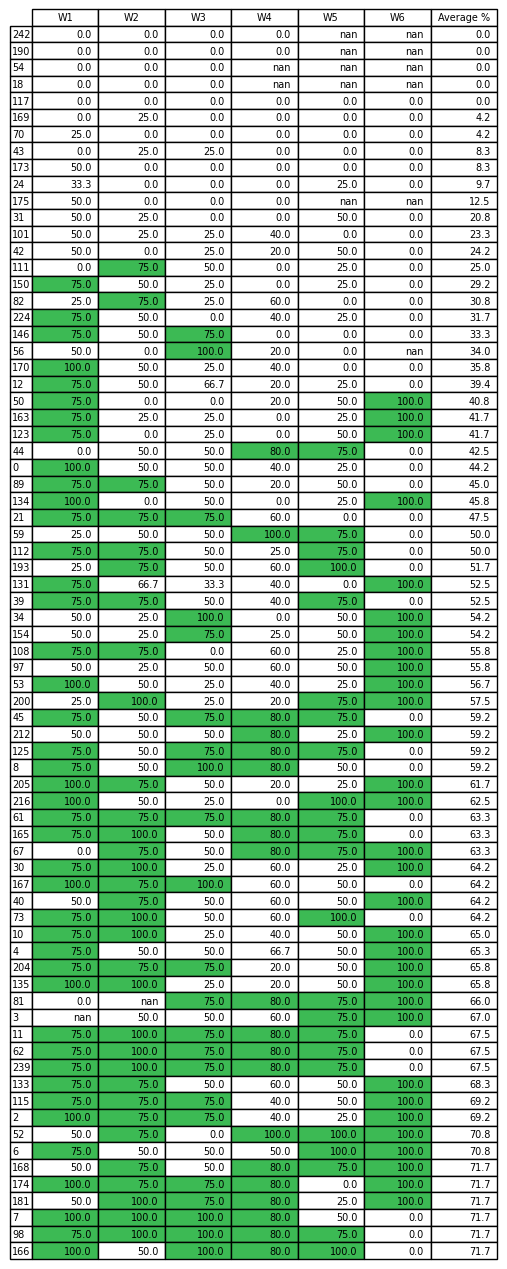

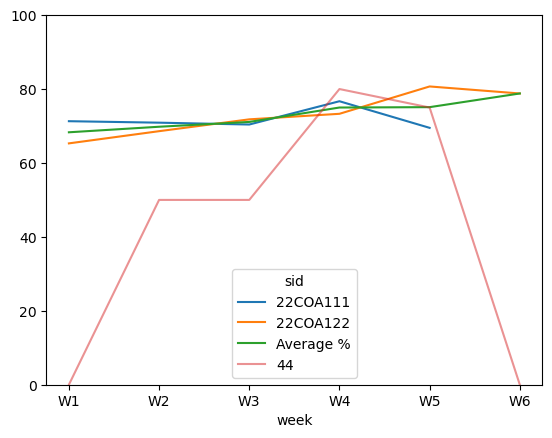

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from CW_Preprocessing import *
import ipynb
from ipynb.fs.defs.CW_Preprocessing import *


class PoorAtt:

    def __init__(self, modules_list):
        self.modules_list = modules_list
        self.selected_modules_df = pd.DataFrame()
        self.students_weekly_avg_att = pd.DataFrame()
        self.modules_weekly_avg_att = pd.DataFrame()
        self.merge_modules()
        self.get_student_weekly_avg_att()
        self.dept_avg = self.students_weekly_avg_att['Average %'].mean()
        self.get_module_weekly_avg_att()
        self.below_avg_att = self.get_below_avg_att_df()

    def merge_modules(self):
        for module in self.modules_list:
            att_df = ModuleRecord(module).wide_to_long()
            self.selected_modules_df = pd.concat([self.selected_modules_df, att_df])

    def get_student_weekly_avg_att(self):
        self.students_weekly_avg_att = pd.pivot_table(self.selected_modules_df,
                                                      values="att",
                                                      index="sid",
                                                      columns="week",
                                                      aggfunc=np.mean
                                                      )
        students_avg_att = self.selected_modules_df.groupby("sid")["att"].mean()
        self.students_weekly_avg_att['Average %'] = students_avg_att
        self.students_weekly_avg_att = self.students_weekly_avg_att.sort_values(by="Average %")
        self.students_weekly_avg_att = (self.students_weekly_avg_att * 100).round(1)

    def get_below_avg_att_df(self):
        return self.students_weekly_avg_att[self.students_weekly_avg_att['Average %'] < self.dept_avg]

    def get_module_weekly_avg_att(self):
        self.modules_weekly_avg_att = pd.pivot_table(self.selected_modules_df,
                                                      values="att",
                                                      index="week",
                                                      columns="module",
                                                      aggfunc=np.mean
                                                      )
        self.modules_weekly_avg_att['Average %'] = self.modules_weekly_avg_att.mean(axis=1)
        self.modules_weekly_avg_att = self.modules_weekly_avg_att.sort_values(by="Average %")
        self.modules_weekly_avg_att = (self.modules_weekly_avg_att * 100).round(1)

    def get_n_students_table(self, n=None):
        if n:
            df = self.get_below_avg_att_df().head(n)
        else:
            df = self.get_below_avg_att_df()

        cell_colors = []
        for row in range(df.shape[0]):
            row_colors = []
            for col in range(df.shape[1]-1):
                if df.iloc[row, col] > self.dept_avg:
                    row_colors.append("#3CBA54")
                else:
                    row_colors.append("#FFFFFF")
            row_colors.append("#FFFFFF")
            cell_colors.append(row_colors)

        fig, ax = plt.subplots()
        figure = ax.get_figure()
        figure.set_size_inches(6, df.shape[0]*0.18)
        ax.axis('off')
        ax.axis('tight')
        ax.table(cellText=df.values,
                 cellColours=cell_colors,
                 rowLabels=df.index,
                 colLabels=df.columns,
                 loc='center')
        plt.savefig('PA.png')

    def get_scatter_plot(self, sid_list=None):
        module_att = self.modules_weekly_avg_att

        fig, ax = plt.subplots()
        plt.ylim(0, 100)
        module_att.plot(kind="line", ax=ax)

        student_df = self.students_weekly_avg_att.drop(columns=["Average %"]).T
        if sid_list:
            student_df = student_df[sid_list]
            student_df.plot(kind="line", ax=ax, alpha=0.5)
        return fig


if __name__ == "__main__":
    poor_att = PoorAtt(get_modules_list())
    poor_att.get_n_students_table()
    poor_att.get_scatter_plot(sid_list=[44])


